### Experiments with Bagging
Try a standard Decision Tree regressor in scikitm then try bagging by using many trees and averaging result

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle

score for 1 tree:0.9870439357984603


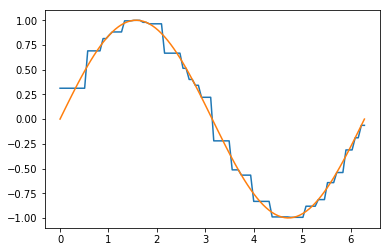

In [2]:
# create the data
T = 100
x_axis = np.linspace(0, 2 * np.pi, T)  # 0-2pi straight diagonal line - features
y_axis = np.sin(x_axis)  # sinusoid   - targets

# get the traing data
N = 30
idx = np.random.choice(T, size=N, replace=True)
Xtrain = x_axis[idx].reshape(N, 1)
Ytrain = y_axis[idx]

# try lone decision tree
model = DecisionTreeRegressor()
model.fit(Xtrain, Ytrain)
pred = model.predict(x_axis.reshape(T, 1))  # must be 2D for scikit
# score (test samples(features), test targets
print("score for 1 tree:{}".format(model.score(x_axis.reshape(T, 1), y_axis)))

plt.plot(x_axis, pred)
plt.plot(x_axis, y_axis)
plt.show()

score for bagged tree: 0.983185612539934


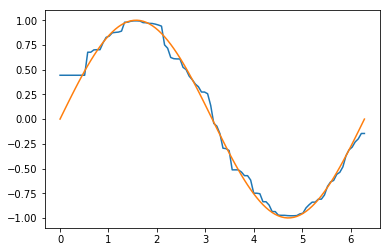

In [7]:
# now try bagging
class BaggedTreeRegressor:
    def __init__(self, B):
        self.B = B

    def fit(self, X, Y):
        N = len(X)
        self.models = []
        for b in range(self.B):
            idx = np.random.choice(N, size=N, replace=True)
            Xb = X[idx]
            Yb = Y[idx]

            model = DecisionTreeRegressor()
            model.fit(Xb, Yb)
            self.models.append(model)

    def predict(self, X):
        predictions = np.zeros(len(X))
        for model in self.models:
            predictions += model.predict(X)
        return predictions / self.B

    def score(self, X, Y):
        d1 = Y - self.predict(X)
        d2 = Y - Y.mean()
        return 1 - d1.dot(d1) / d2.dot(d2)


model = BaggedTreeRegressor(300)
model.fit(Xtrain, Ytrain)
print ("score for bagged tree:", model.score(x_axis.reshape(T, 1), y_axis))
prediction = model.predict(x_axis.reshape(T, 1))

# plot the bagged regressor's predictions
plt.plot(x_axis, prediction)
plt.plot(x_axis, y_axis)
plt.show()

More closely follows the sin wave - needs further analysis